## 라이브러리 import

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import scipy.stats       as sp
import matplotlib.pyplot as plt

.

.

.



## 데이터 불러오기

In [2]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData.csv', sep=',', header=None)
FeatureData.shape

(360, 270)

특징데이터 정상/고장 분리

In [3]:
NoOfData = int(FeatureData.shape[0]/2)
Normal_FeatureData   = FeatureData.iloc[:NoOfData, :]
Abnormal_FeatureData = FeatureData.iloc[NoOfData:, :]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

(180, 270)
(180, 270)


.

.

.



## P-value 계산

In [4]:
NoOfFeature = FeatureData.shape[1] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[:, i] , Abnormal_FeatureData.iloc[:, i]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value)
    
P_value      = pd.DataFrame(P_value)
P_value

,0,1
0,0.0,1.014879e-11
1,1.0,8.509037e-11
2,2.0,2.246947e-08
3,3.0,1.340717e-15
4,4.0,5.902344e-12
...,...,...
265,265.0,1.487181e-01
266,266.0,3.428681e-01
267,267.0,4.592642e-08
268,268.0,6.636401e-21


In [6]:
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

P_value_Rank

,0,1
198,198.0,4.762393e-81
110,110.0,5.270311e-77
170,170.0,4.615377e-76
133,133.0,5.747675e-74
134,134.0,7.585991e-74
...,...,...
85,85.0,8.999631e-01
95,95.0,9.358453e-01
255,255.0,9.450087e-01
217,217.0,9.695416e-01


In [7]:
# 특징값 저장
path1 = './ProcessedData/P_value.csv'        # path = '파일 경로/저장할 파일 이름'
path2 = './ProcessedData/P_value_Rank.csv'   # path = '파일 경로/저장할 파일 이름'
P_value.to_csv(path1, sep=',', header=None, index=None)
P_value_Rank.to_csv(path2, sep=',', header=None, index=None)

.

.

.



## PDF(Probabilistic Density Function) 그래프 확인 (정상 vs 고장)

C:\Users\BJ\AppData\Local\Temp\ipykernel_21096\503751083.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Normal_FeatureData.iloc  [:, int(P_value_Rank.iloc[FeatureRank-1,0])], label = 'Normal')
C:\Users\BJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BJ\AppData\Local\Temp\ipykernel_21096\503751083.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

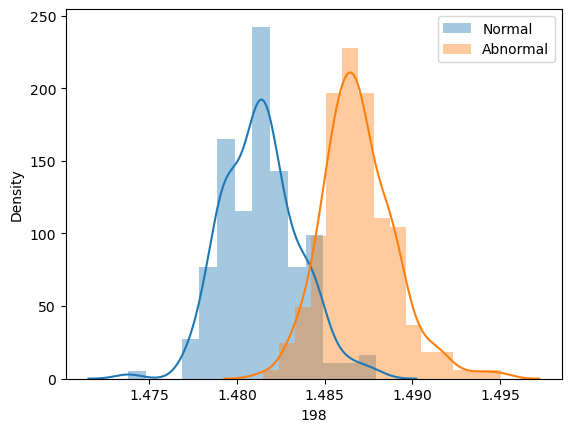

In [8]:
# P-value 낮은 순위
FeatureRank = 1

# PDF 그래프
sns.distplot(Normal_FeatureData.iloc  [:, int(P_value_Rank.iloc[FeatureRank-1,0])], label = 'Normal')
sns.distplot(Abnormal_FeatureData.iloc[:, int(P_value_Rank.iloc[FeatureRank-1,0])], label = 'Abnormal')
plt.legend(loc='upper right')
plt.show()

## P-value 기반 구분성(유의수준↓) 상위 특징값 선택

In [9]:
Rank = 30

Normal   = np.zeros((NoOfData, Rank))
Abnormal = np.zeros((NoOfData, Rank))

for i in range(Rank):
    
    index          = int(P_value_Rank.iloc[i,0])
    Normal  [:, i] = Normal_FeatureData.iloc  [:, index].values
    Abnormal[:, i] = Abnormal_FeatureData.iloc[:, index].values

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=0))

print("Selected Feature Data Size :", FeatureSelected.shape)
print("= 데이터 %d개(정상/고장 각 %d개씩)가 각각 %d개의 최종 선택된 특징값으로 구성됨"
      %(FeatureSelected.shape[0], FeatureSelected.shape[0]/2, FeatureSelected.shape[1]))

Selected Feature Data Size : (360, 30)
= 데이터 360개(정상/고장 각 180개씩)가 각각 30개의 최종 선택된 특징값으로 구성됨


최종 선택된 특징 데이터 저장 (.csv 파일)

In [10]:
path = './ProcessedData/FeatureSelected.csv'   # path = '파일 경로//저장할 파일 이름'
FeatureSelected.to_csv(path, sep=',', header=None, index=None)